# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
#Import data set and visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to compute distances
from scipy.spatial.distance import cdist, pdist

# To split the data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (f1_score,accuracy_score,recall_score,precision_score,
    confusion_matrix,classification_report,roc_auc_score,precision_recall_curve
    ,roc_curve,make_scorer)

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# loading data into a pandas dataframe
data = pd.read_csv("/content/drive/MyDrive/MIT DS/Project/ExtraaLearn.csv", sep=",")

Mounted at /content/drive


## Data Overview

- Observations
- Sanity checks

In [3]:
data.info() #Prints information about a DataFrame .
data.describe() #Generate descriptive statistics.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126,0.298569
std,13.161454,2.829134,743.828683,1.968125,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750,0.000000
50%,51.000000,3.000000,376.000000,2.792000,0.000000
75%,57.000000,5.000000,1336.750000,3.756250,1.000000
max,63.000000,30.000000,2537.000000,18.434000,1.000000


In [4]:
data.head() #Returns the first n rows for the object based on position.

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [5]:
data.isnull().sum()
#data.duplicated().sum()

,0
ID,0
age,0
current_occupation,0
first_interaction,0
profile_completed,0
website_visits,0
time_spent_on_website,0
page_views_per_visit,0
last_activity,0
print_media_type1,0


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [6]:
data=data.dropna() #Remove the missing values
data.isnull().sum() #Count the number of missing values in each column.

,0
ID,0
age,0
current_occupation,0
first_interaction,0
profile_completed,0
website_visits,0
time_spent_on_website,0
page_views_per_visit,0
last_activity,0
print_media_type1,0


In [7]:
anyduplicate=data.duplicated().any() #Check if there are any duplicate rows.
Contduplicated=data.duplicated().sum() #Count the number of duplicate rows.
print("Exist any duplicate",anyduplicate, "and how many duplicates are there",Contduplicated) #Prints the values to a stream, or to sys.stdout by default.

Exist any duplicate False and how many duplicates are there 0


In [8]:
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))
    ax = sns.countplot(data=data, x=feature,palette="Paired",order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points",)  # annotate the percentage
    plt.show()

**Age and Ocuppation data**

In [9]:
#Group the data by current occupation and status and count the occurrences
occupation_status_counts = data.groupby(['current_occupation', 'status']).size().unstack(fill_value=0)

#Calculate the total number of leads for each occupation
occupation_status_counts['Total'] = occupation_status_counts.sum(axis=1)

#Calculate the percentage of leads with status 1 (converted) for each occupation
occupation_status_counts['%Conversion_Rate'] =100* occupation_status_counts[1] / occupation_status_counts['Total']
#Out
occupation_status_counts

status,0,1,Total,%Conversion_Rate
current_occupation,,,,
Professional,1687,929,2616,35.512232
Student,490,65,555,11.711712
Unemployed,1058,383,1441,26.578765


age,57,58,56,59,60,55,32,53,24,43
count,385,382,330,328,238,200,188,91,90,89


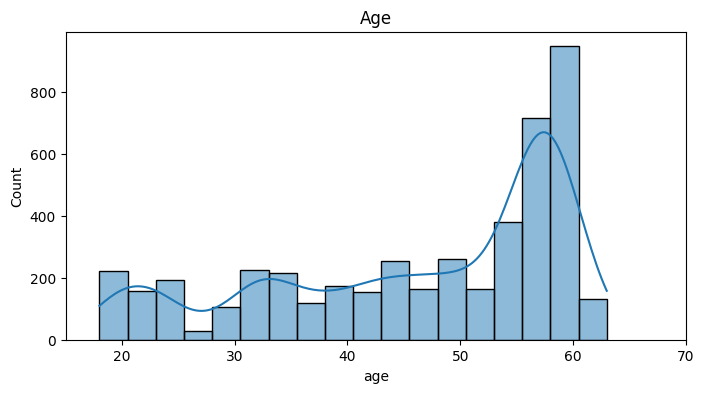

In [10]:
plt.figure(figsize=(8, 4))
sns.histplot(data,x='age' ,kde=True)
plt.xlim(15,70)
plt.title('Age')
data['age'].value_counts().to_frame().head(10).T

Text(0, 0.5, 'Current Occupation')

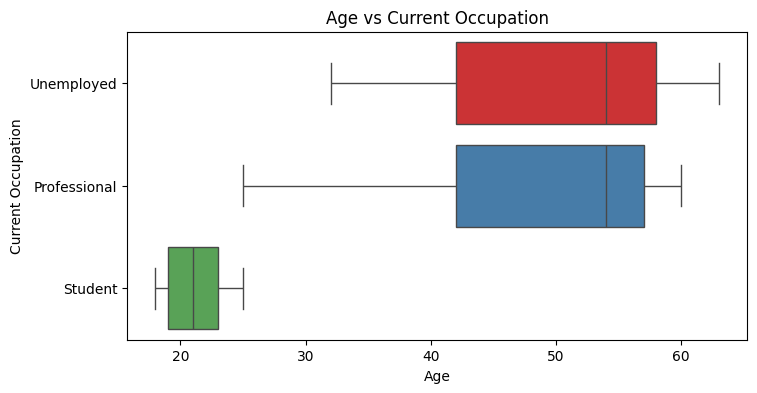

In [11]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=data, x='age', y='current_occupation' , palette='Set1')
plt.title('Age vs Current Occupation')
plt.xlabel('Age')
plt.ylabel('Current Occupation')

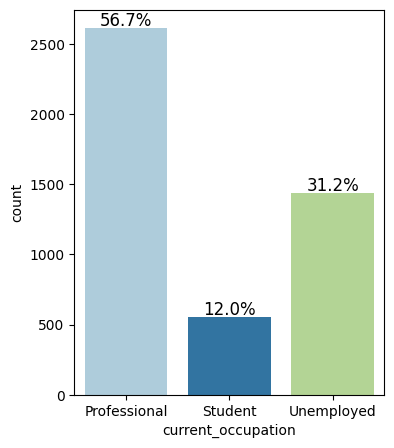

In [12]:
labeled_barplot(data, "current_occupation", perc=True)

**Profile data**

In [13]:
profile_status_counts = data.groupby(['profile_completed', 'status']).size().unstack(fill_value=0)
profile_status_counts['Total'] = profile_status_counts.sum(axis=1)
profile_status_counts['%Conversion_Rate'] =100* profile_status_counts[1] / profile_status_counts['Total']

status,0,1,Total,%Conversion_Rate
profile_completed,,,,
High,1318,946,2264,41.784452
Low,99,8,107,7.476636
Medium,1818,423,2241,18.875502


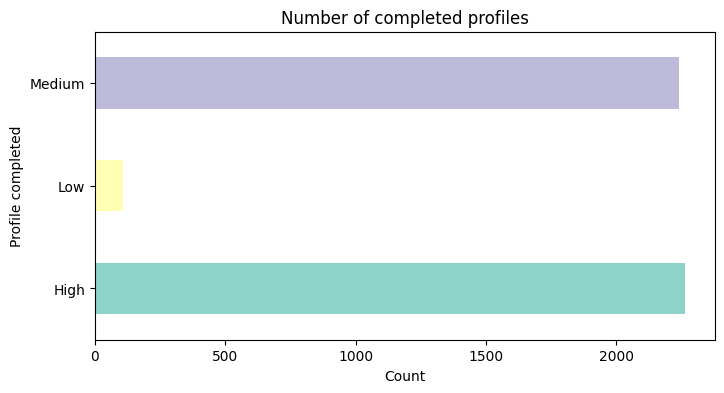

In [14]:
plt.figure(figsize=(8, 4))
data.groupby('profile_completed').size().plot(kind='barh', color=sns.palettes.color_palette('Set3', 3))
plt.title('Number of completed profiles')
plt.xlabel('Count')
plt.ylabel('Profile completed')
profile_status_counts

Text(0, 0.5, '% Conversion')

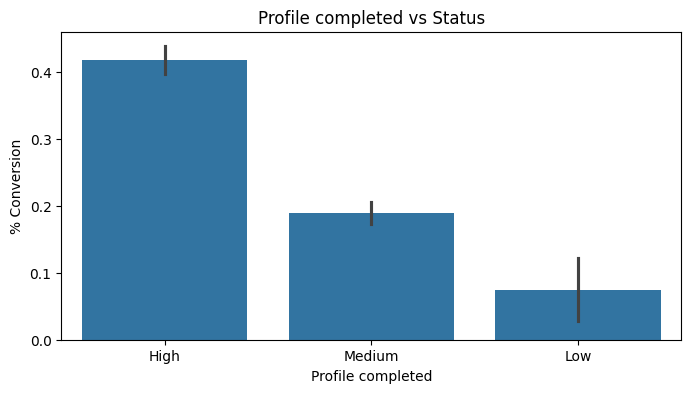

In [15]:
plt.figure(figsize=(8, 4))
sns.barplot(data=data, x='profile_completed', y='status')
plt.title('Profile completed vs Status')
plt.xlabel('Profile completed')
plt.ylabel('% Conversion')

**Website data**

website_visits,2,1,3,4,5,6,7,0,8,9
count,1229,755,641,494,422,282,232,174,151,78


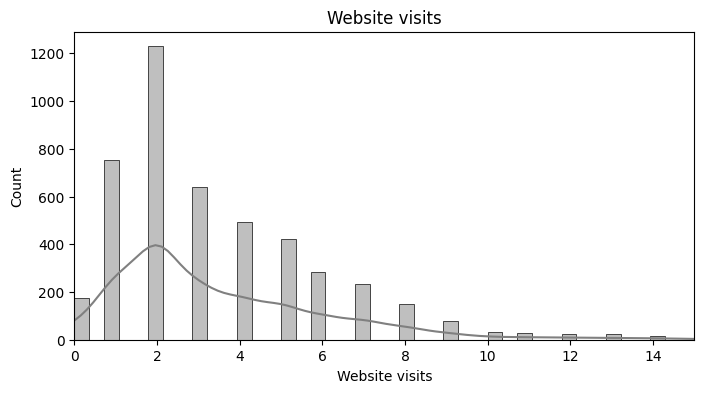

In [16]:
plt.figure(figsize=(8, 4))
sns.histplot(data,x='website_visits' ,kde=True , color='grey')
plt.xlim(0,15)
plt.title('Website visits')
plt.xlabel('Website visits')
data['website_visits'].value_counts().to_frame().head(10).T

Text(0.5, 0, 'Time spent on website')

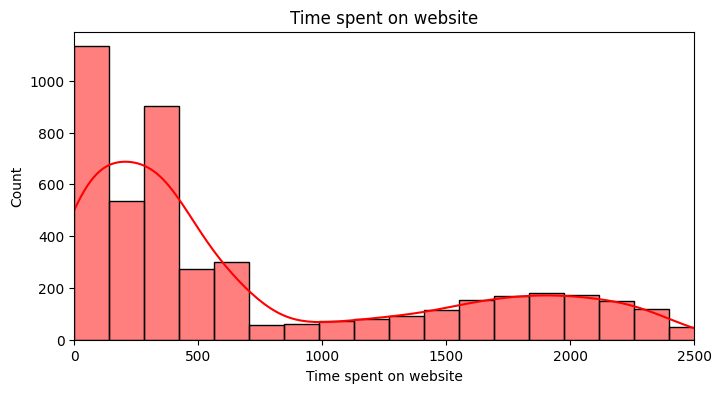

In [17]:
plt.figure(figsize=(8, 4))
sns.histplot(data,x='time_spent_on_website' ,kde=True , color='red')
plt.xlim(0,2500)
plt.title('Time spent on website')
plt.xlabel('Time spent on website')

Text(0.5, 0, 'Page views per visit')

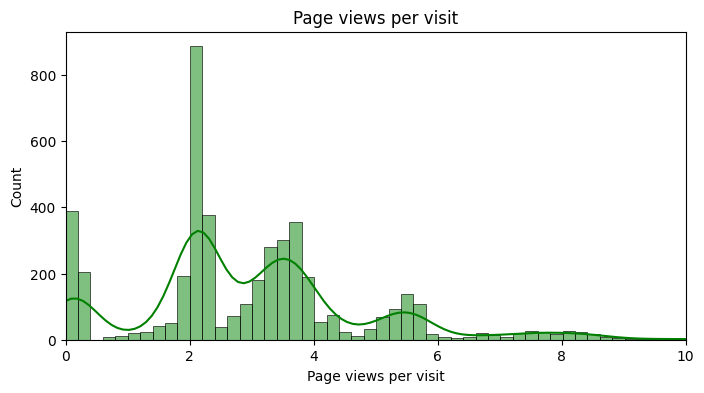

In [18]:
plt.figure(figsize=(8, 4))
sns.histplot(data,x='page_views_per_visit' ,kde=True , color='green')
plt.xlim(0,10)
plt.title('Page views per visit')
plt.xlabel('Page views per visit')

**Answer 1** Find out how current occupation affects lead status.

As shown in the graph below, people who are currently working and in a professional stage have shown the greatest potential to access ExtraaLearn's offerings.
On the other hand, unemployed people also have a high demand for online education.

status,0,1,Total,%Conversion_Rate
current_occupation,,,,
Professional,1687,929,2616,35.512232
Student,490,65,555,11.711712
Unemployed,1058,383,1441,26.578765


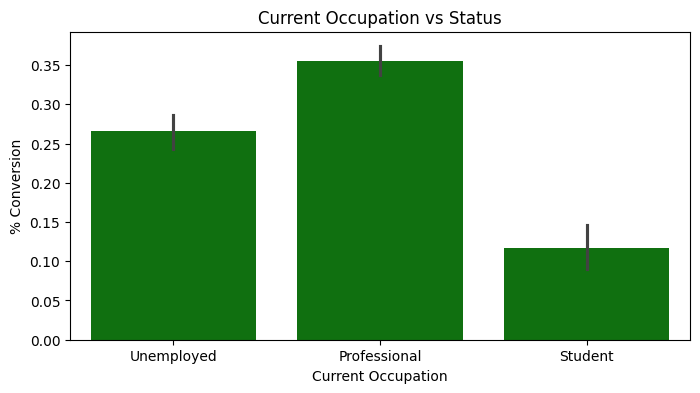

In [19]:
plt.figure(figsize=(8, 4))
sns.barplot(data=data, x='current_occupation', y='status' , color='green')
plt.title('Current Occupation vs Status')
plt.xlabel('Current Occupation')
plt.ylabel('% Conversion')
occupation_status_counts

**Answer 2** Do the first channels of interaction have an impact on the lead status?

Two graphs are shown: one in which we can see the number of interactions, and the next graph shows the conversion rate based on interaction.
The first graph shows that customers use the website more, with 55.1%. In the second graph, we can see how the website achieves a 45.6% conversion rate compared to the mobile app.
According to this, we can see that on mobile platforms, only about 5 out of every 100 people have a positive status.
On websites, about 25 out of every 100 people have a positive status.

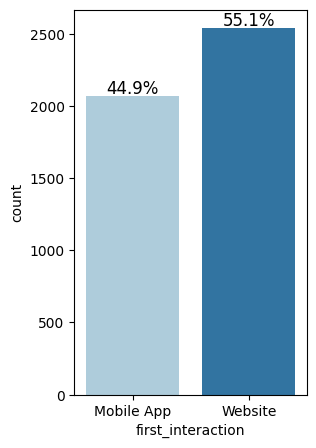

In [20]:
labeled_barplot(data, "first_interaction", perc=True)

status,0,1,Total,%Conversion_Rate
first_interaction,,,,
Mobile App,1852,218,2070,10.531401
Website,1383,1159,2542,45.594020


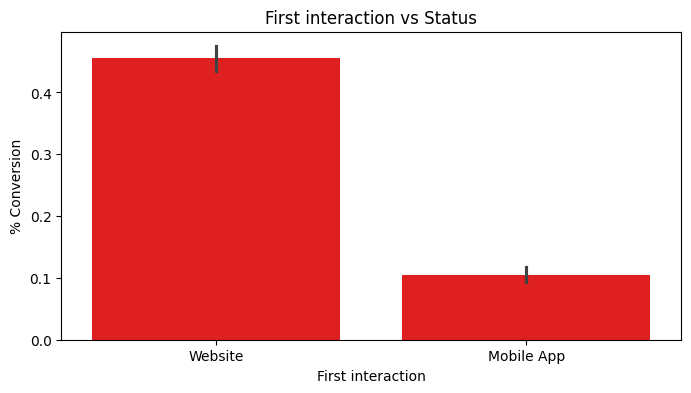

In [21]:
interaction_status_counts = data.groupby(['first_interaction', 'status']).size().unstack(fill_value=0)
interaction_status_counts['Total'] = interaction_status_counts.sum(axis=1)
interaction_status_counts['%Conversion_Rate'] =100* interaction_status_counts[1] / interaction_status_counts['Total']

plt.figure(figsize=(8, 4))
sns.barplot(data=data, x='first_interaction', y='status', color='Red')
plt.title('First interaction vs Status')
plt.xlabel('First interaction')
plt.ylabel('% Conversion')
interaction_status_counts

**Answer 3** Do the first channels of interaction have an impact on the lead status?:

People prefer email activity over using their phone or the web.
And the positive conversion rate based on the most recent activity is:
Website Activity 38.4%,
Email Activity 30.3%,
Phone Activity 21.3%

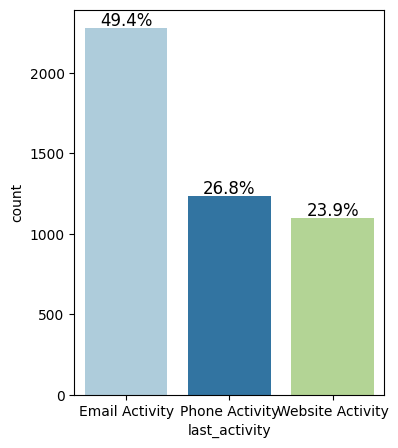

In [22]:
labeled_barplot(data, "last_activity", perc=True)

status,0,1,Total,%Conversion_Rate
last_activity,,,,
Email Activity,1587,691,2278,30.333626
Phone Activity,971,263,1234,21.312804
Website Activity,677,423,1100,38.454545


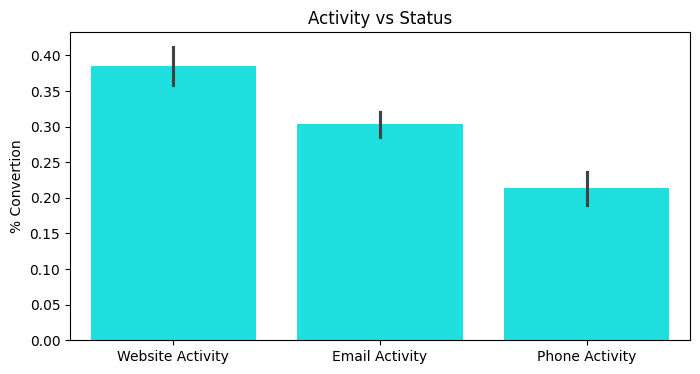

In [23]:
activity_status_counts = data.groupby(['last_activity', 'status']).size().unstack(fill_value=0)
activity_status_counts['Total'] = activity_status_counts.sum(axis=1)
activity_status_counts['%Conversion_Rate'] =100* activity_status_counts[1] / activity_status_counts['Total']

plt.figure(figsize=(8, 4))
sns.barplot(data=data, x='last_activity', y='status' , color='cyan')
plt.title('Activity vs Status')
plt.xlabel('')
plt.ylabel('% Convertion')
activity_status_counts

**Answer 4** Which of these channels have the highest lead conversion rate?:

The channels with the greatest potential in order of success are: Educational 15.3%, Digital media 11.4% and Newspaper 10.8%.

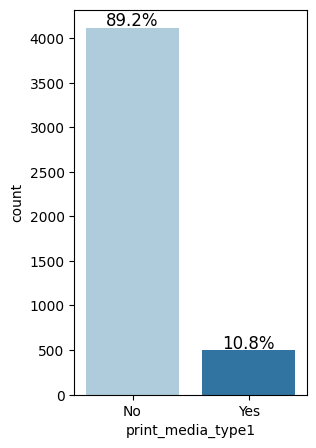

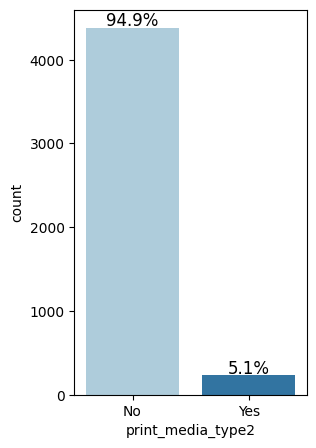

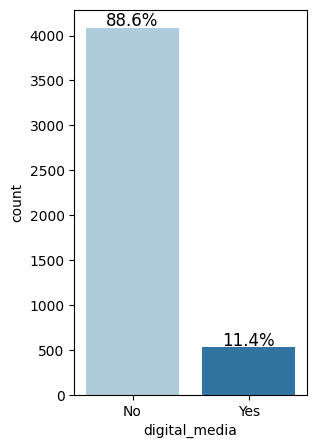

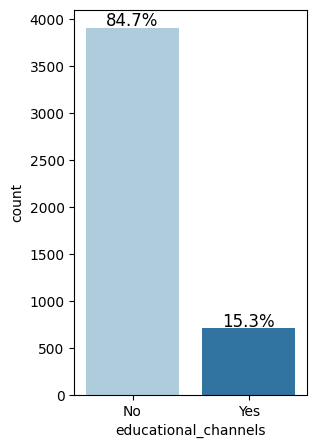

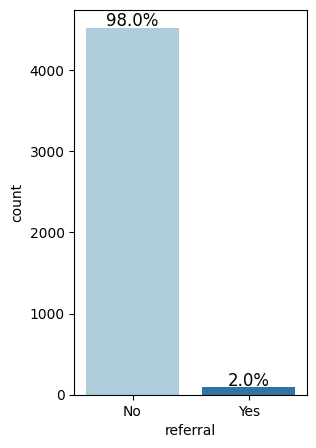

In [24]:
labeled_barplot(data, "print_media_type1", perc=True)
labeled_barplot(data, "print_media_type2", perc=True)
labeled_barplot(data, "digital_media", perc=True)
labeled_barplot(data, "educational_channels", perc=True)
labeled_barplot(data, "referral", perc=True)

**Answer 5** Does having more details about a prospect increase the chances of conversion?

Having a more complete customer profile definitely generates a positive status. (High 41.78%) generates a positive conversion status.

status,0,1,Total,%Conversion_Rate
profile_completed,,,,
High,1318,946,2264,41.784452
Low,99,8,107,7.476636
Medium,1818,423,2241,18.875502


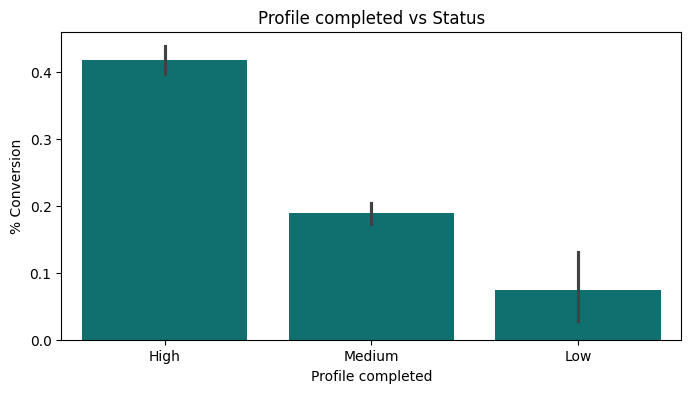

In [25]:
plt.figure(figsize=(8, 4))
sns.barplot(data=data, x='profile_completed', y='status' , color='Teal')
plt.title('Profile completed vs Status')
plt.xlabel('Profile completed')
plt.ylabel('% Conversion')
profile_status_counts

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [27]:
data.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126,0.298569
std,13.161454,2.829134,743.828683,1.968125,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750,0.000000
50%,51.000000,3.000000,376.000000,2.792000,0.000000
75%,57.000000,5.000000,1336.750000,3.756250,1.000000
max,63.000000,30.000000,2537.000000,18.434000,1.000000


In [28]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [29]:
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [30]:
data.isnull().sum()

,0
ID,0
age,0
current_occupation,0
first_interaction,0
profile_completed,0
website_visits,0
time_spent_on_website,0
page_views_per_visit,0
last_activity,0
print_media_type1,0


In [31]:
data.duplicated().sum()

np.int64(0)

Outlier Detetion and Correction

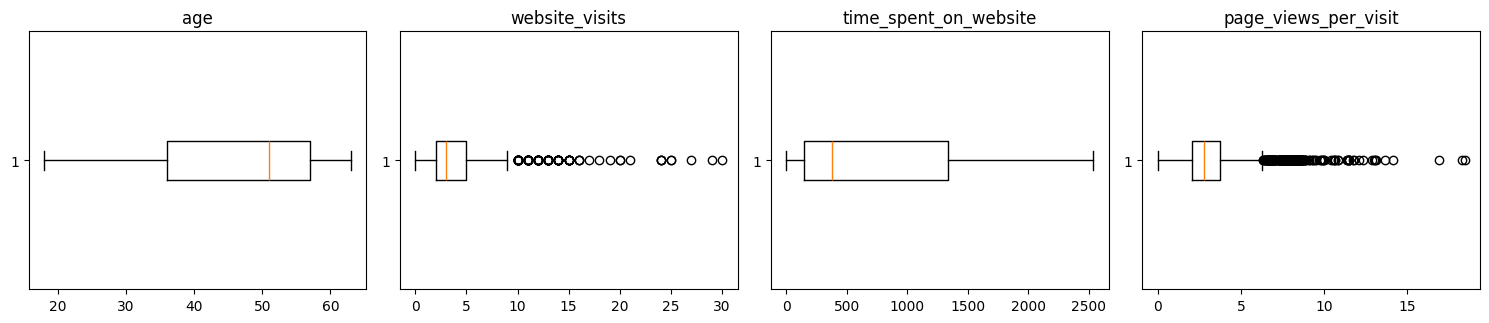

In [32]:
# outlier detection
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5 , vert=False)
    plt.title(variable)
    plt.tight_layout()
    plt.title(variable)
plt.show()

In [33]:
len(data)

4612

In [34]:
data_clean = data.copy()
data_clean=data_clean[data_clean['website_visits'] <= 9]
len(data_clean)

4458

In [35]:
data_clean_f=data_clean[data_clean['page_views_per_visit'] <=6]
len(data_clean_f)

4197

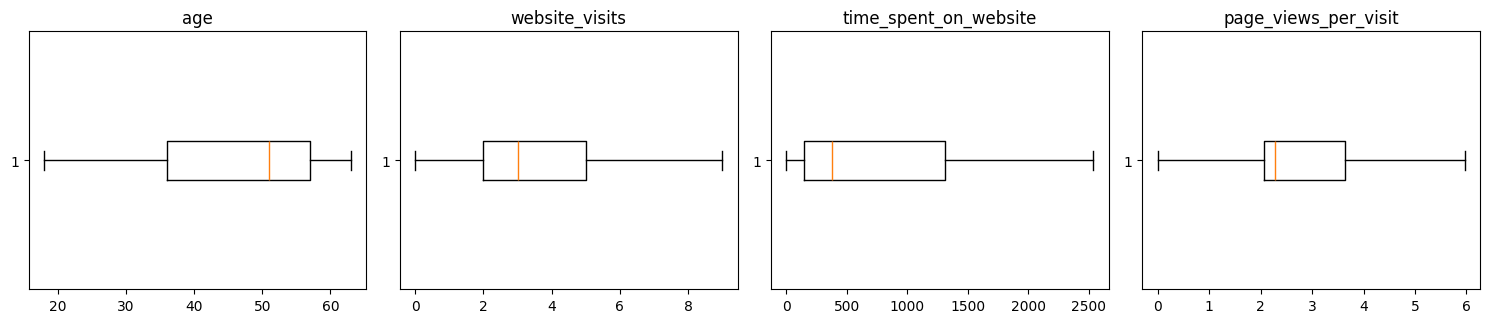

In [36]:
# outlier detection n clean Data
numeric_columns_clean = data_clean_f.select_dtypes(include=np.number).columns.tolist()
numeric_columns_clean.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data_clean_f[variable], whis=1.5 , vert=False)
    plt.title(variable)
    plt.tight_layout()
    plt.title(variable)
plt.show()

## Building a Decision Tree model

Data Preparation for modeling

In [37]:
# Splitting the data
X = data_clean_f.drop(["status"], axis=1)
X = pd.get_dummies(X, drop_first=True)
Y =data_clean_f["status"]

X_train, X_test, y_train, y_test =train_test_split(X, Y, test_size=0.30, random_state=1)

print("Shape of Training set :", X_train.shape ,"and Shape of test set :", X_test.shape , "     :::(Amount, Total)")
print("Percentage % of classes in training set:", 100*y_train.value_counts(normalize=True).round(3))
print("Percentage % of classes in test set:", 100*y_test.value_counts(normalize=True).round(3))

Shape of Training set : (2937, 4212) and Shape of test set : (1260, 4212)      :::(Amount, Total)
Percentage % of classes in training set: status
0    69.5
1    30.5
Name: proportion, dtype: float64
Percentage % of classes in test set: status
0    70.6
1    29.4
Name: proportion, dtype: float64


In [38]:
#Check the model performance of models and plot the confusion matrix.
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [39]:
data_clean_f=DecisionTreeClassifier( random_state=1)
data_clean_f.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2042
           1       1.00      1.00      1.00       895

    accuracy                           1.00      2937
   macro avg       1.00      1.00      1.00      2937
weighted avg       1.00      1.00      1.00      2937



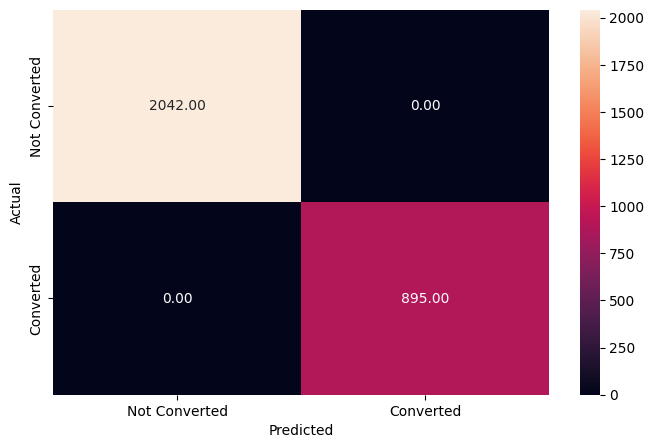

In [40]:
y_train_pred = data_clean_f.predict(X_train)
metrics_score(y_train, y_train_pred)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       890
           1       0.76      0.77      0.76       370

    accuracy                           0.86      1260
   macro avg       0.83      0.83      0.83      1260
weighted avg       0.86      0.86      0.86      1260



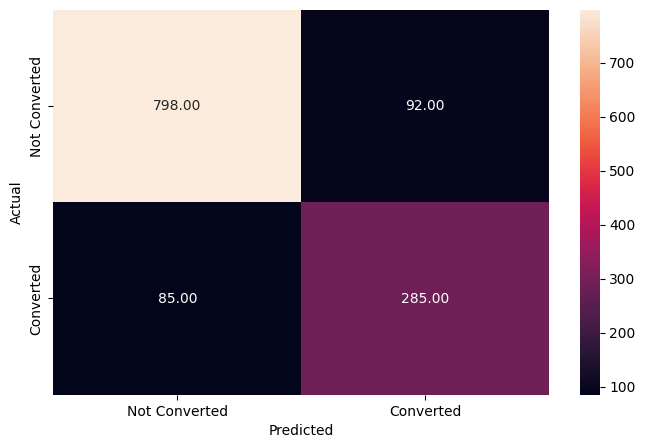

In [41]:
y_test_pred_dt=data_clean_f.predict(X_test)
metrics_score(y_test, y_test_pred_dt)

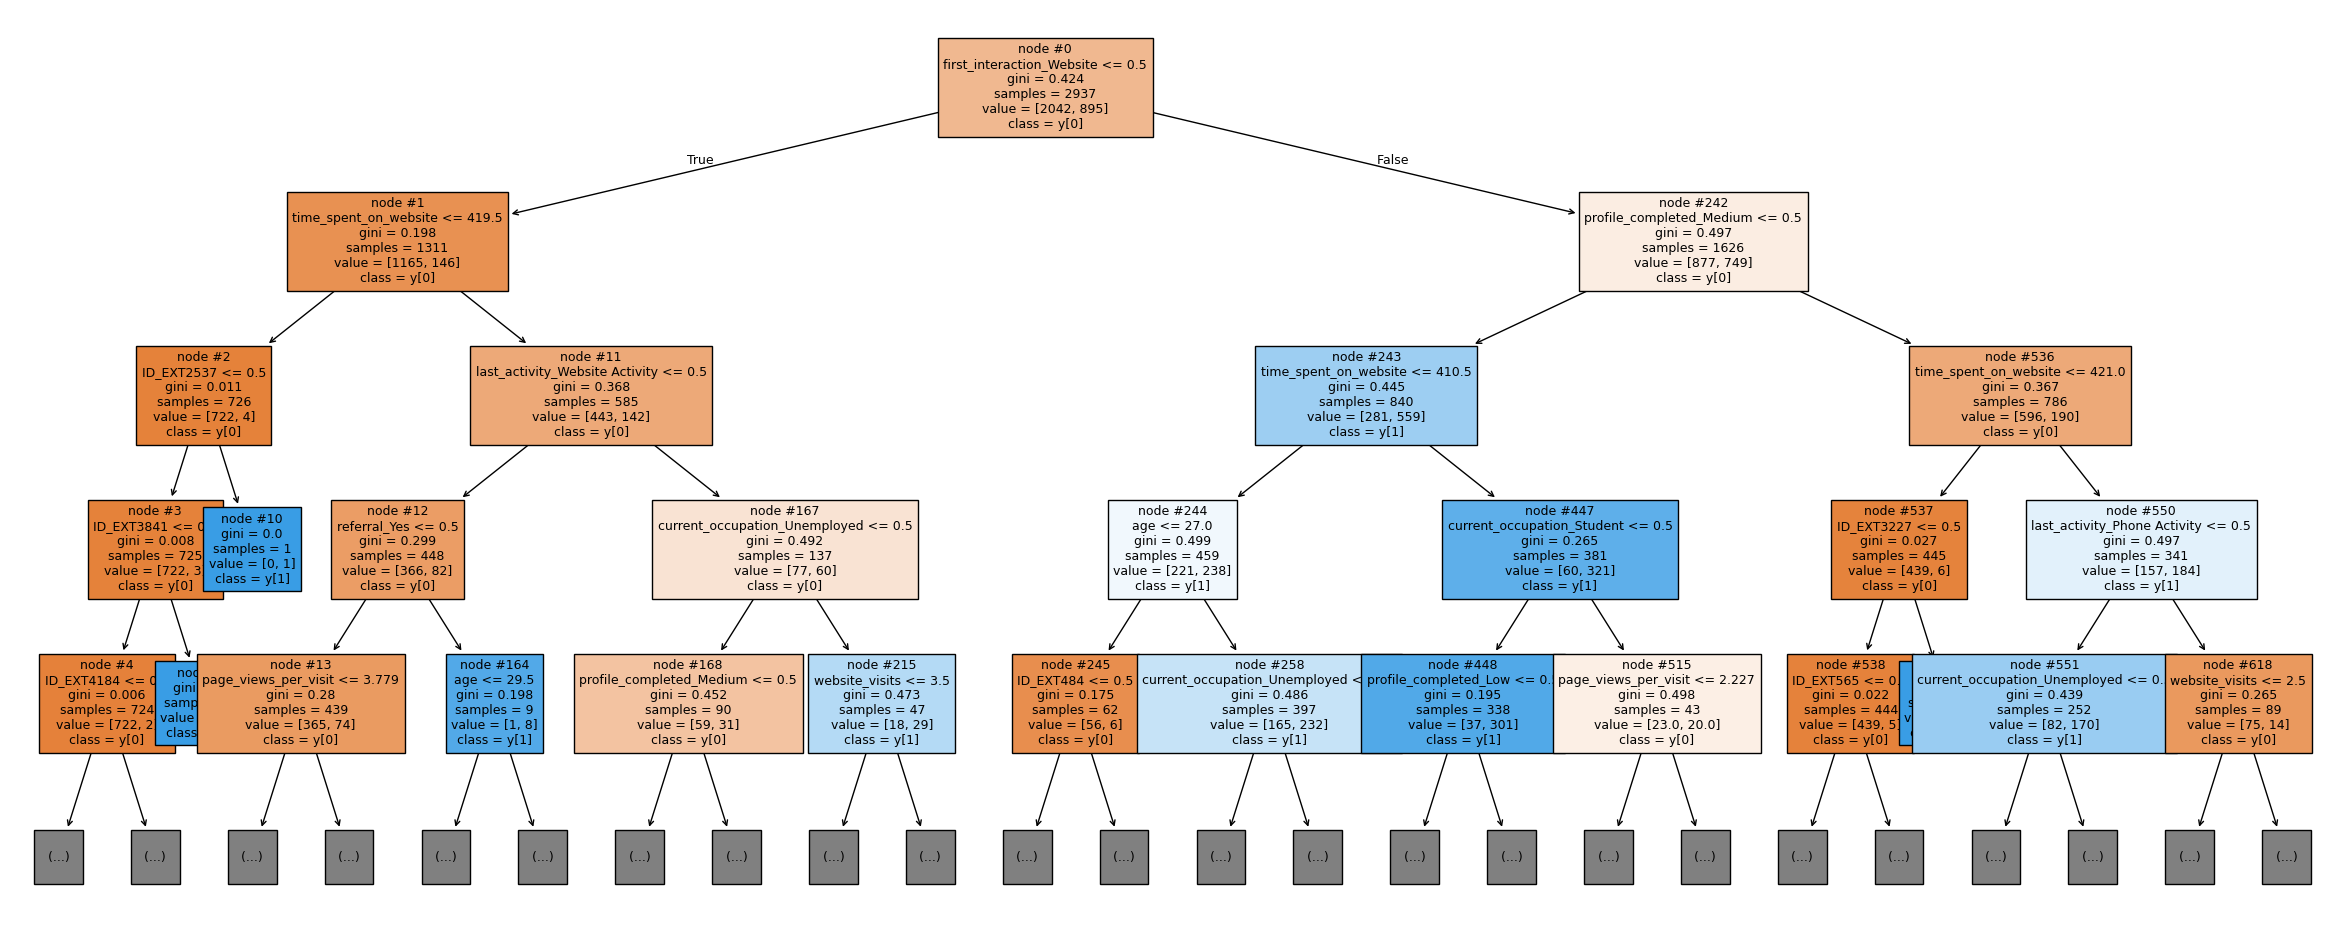

In [42]:
features=list(X_train.columns)

plt.figure(figsize=(30,12))
tree.plot_tree(data_clean_f,feature_names=features, max_depth=4,filled=True,fontsize=9, node_ids=True , class_names=True)
plt.show()

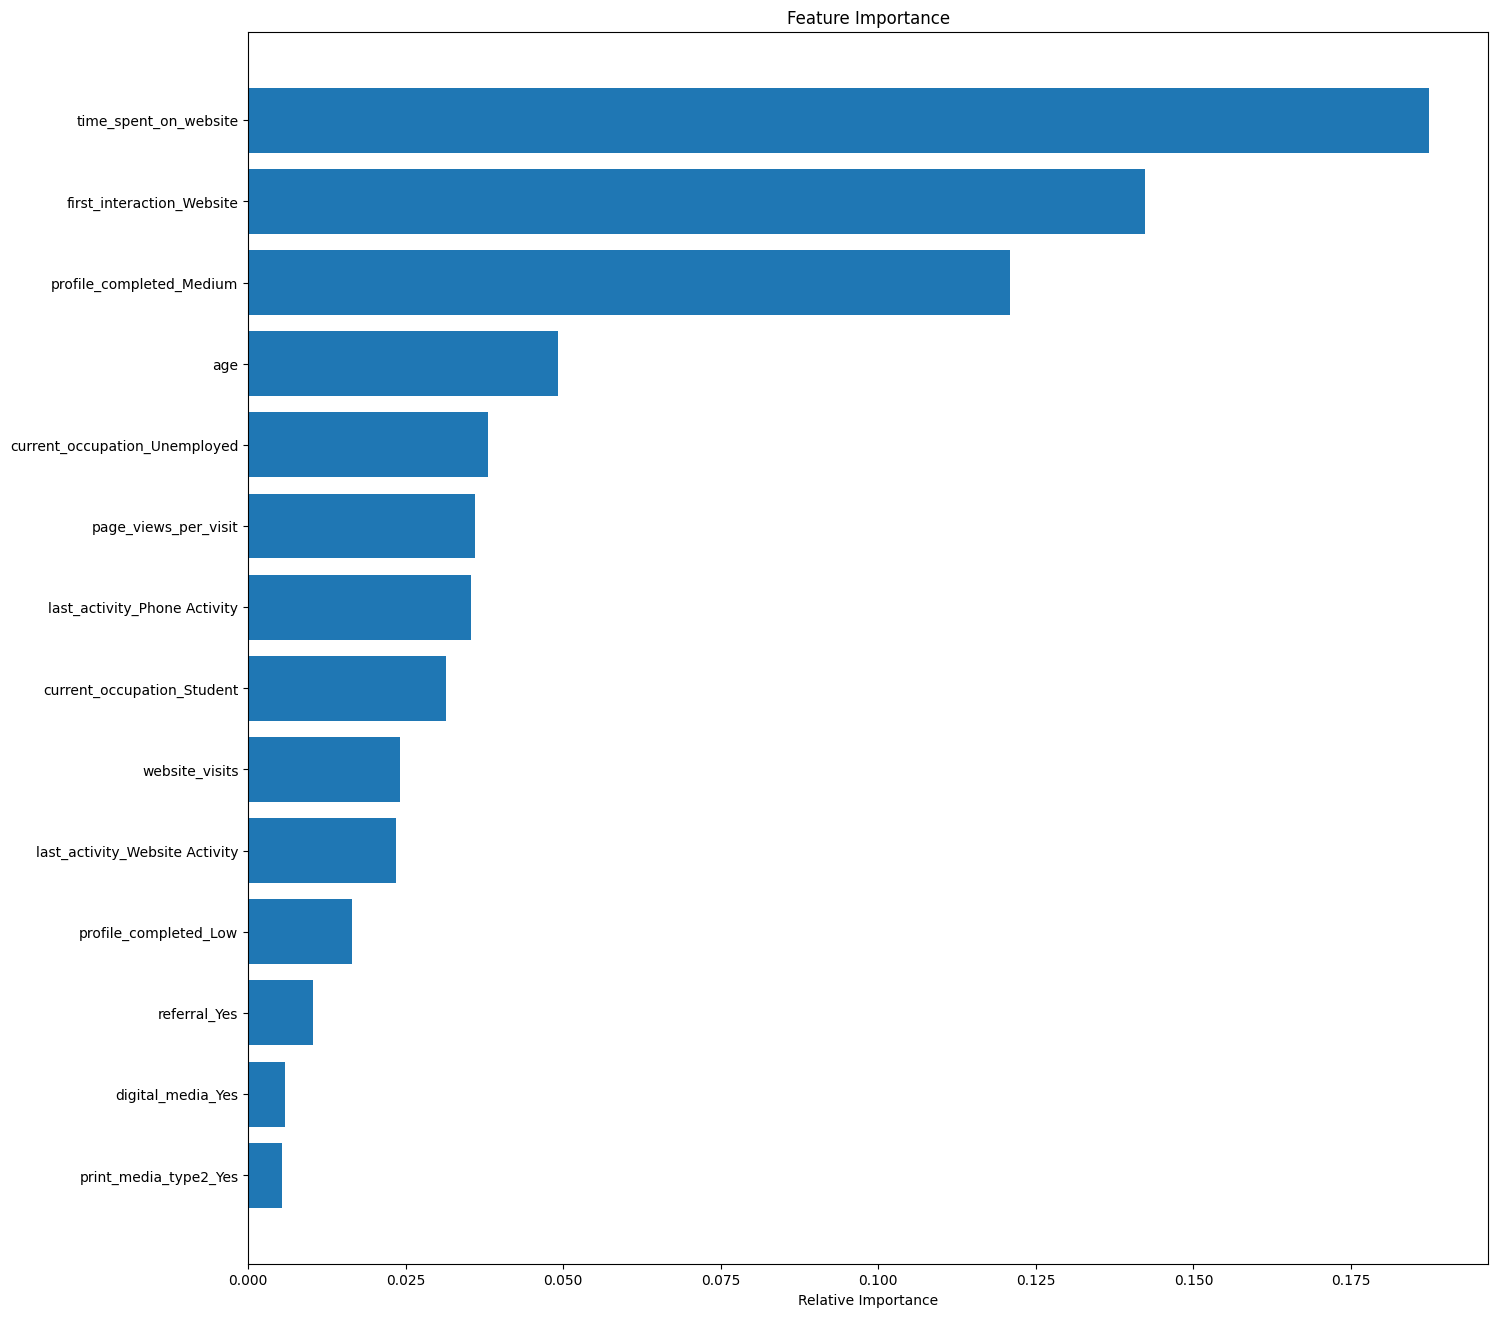

In [43]:
features_names=list(X_train.columns)
importances=data_clean_f.feature_importances_
indices=np.argsort(importances)
num_features_to_plot = 14
top_indices = indices[-num_features_to_plot:]

plt.figure(figsize=(16,16))
plt.title('Feature Importance')
plt.barh(range(len(top_indices)),importances[top_indices],align='center')
plt.yticks(range(len(top_indices)),[features_names[i] for i in top_indices])
plt.xlabel('Relative Importance')
plt.show()

## Do we need to prune the tree?

In [44]:
data_clean_f = DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=1)
data_clean_f.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

## Building a Random Forest model

In [45]:
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2042
           1       1.00      1.00      1.00       895

    accuracy                           1.00      2937
   macro avg       1.00      1.00      1.00      2937
weighted avg       1.00      1.00      1.00      2937



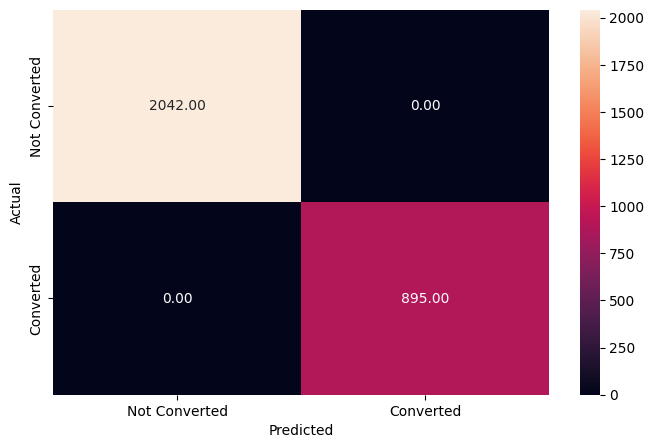

In [46]:
y_train_pred = rf_estimator.predict(X_train)
metrics_score(y_train, y_train_pred)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       890
           1       0.82      0.69      0.75       370

    accuracy                           0.86      1260
   macro avg       0.85      0.81      0.83      1260
weighted avg       0.86      0.86      0.86      1260



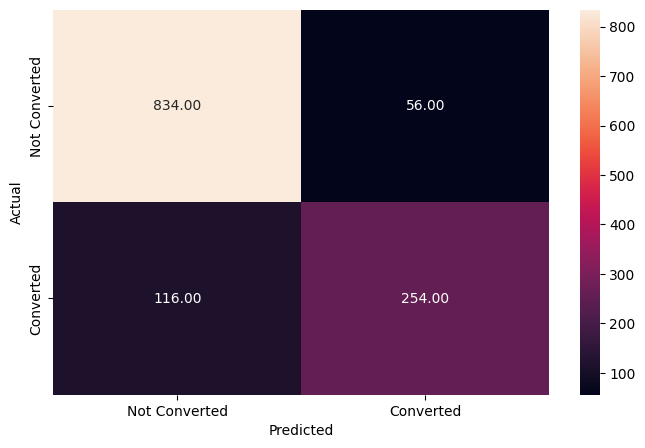

In [47]:
y_test_pred = rf_estimator.predict(X_test)
metrics_score(y_test, y_test_pred)

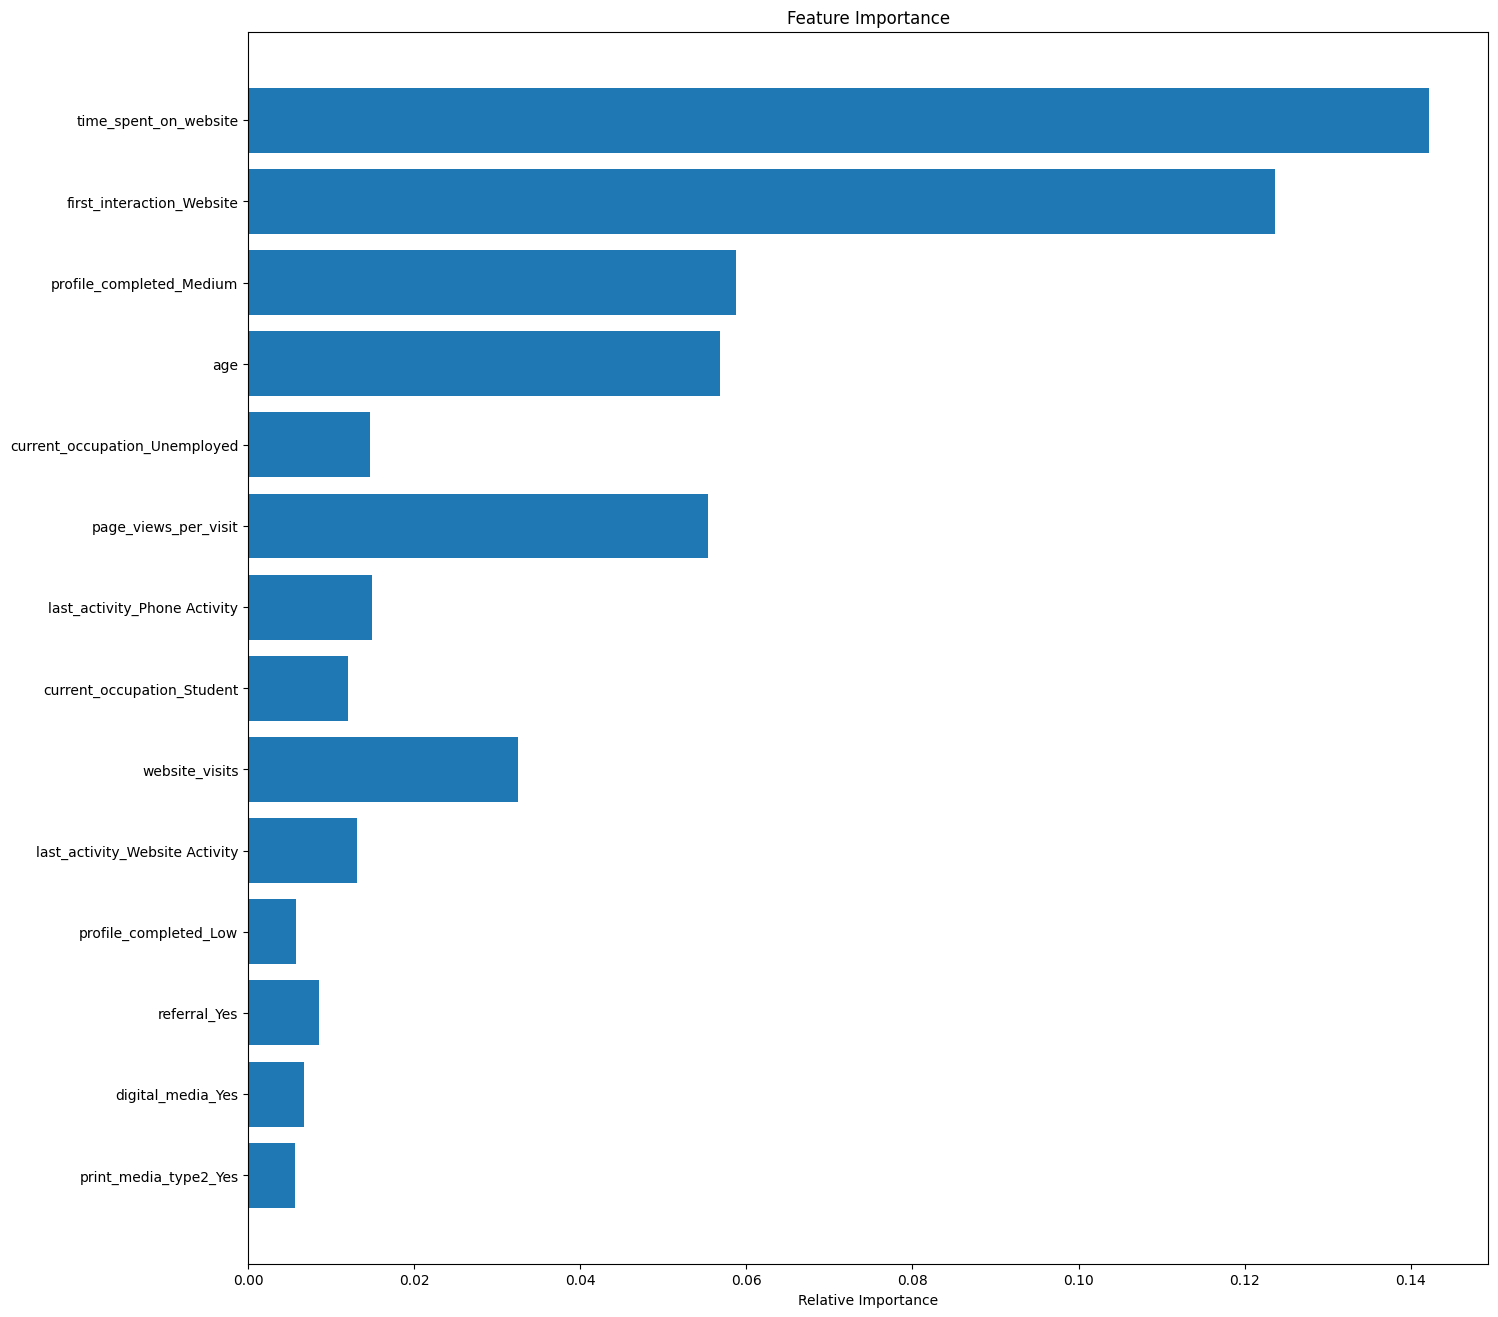

In [48]:
importances=rf_estimator.feature_importances_
colums=X_train.columns
importance_df=pd.DataFrame({"Importance":importances,"Column":colums})
importance_df.sort_values("Importance",ascending=False)
num_features_to_plot_rf = 14
top_indices_rf = indices[-num_features_to_plot_rf:]

plt.figure(figsize=(16,16))
plt.title('Feature Importance')

plt.barh(range(len(top_indices_rf)),importances[top_indices_rf],align='center')
plt.yticks(range(len(top_indices_rf)),[features_names[i] for i in top_indices_rf])
plt.xlabel('Relative Importance')
plt.show()

## Actionable Insights and Recommendations

The majority of people are between 55 and 60 years old, are professionals or unemployed. The most complete profiles are those with the highest conversion rate. These profiles are generally professionals or unemployed. The greatest interaction is achieved with the website, which also offers the highest conversion rate. Email activity is the most influential activity, but the one that achieves the best conversions is website activity.
The channels with the greatest potential in order of success are: Educational 15.3%, Digital media 11.4%, and Newspaper 10.8%.

In the decision tree:
False Positives: 92 cases were incorrectly predicted as "Converted" (when in fact they were not).
False Negatives: 85 cases were incorrectly predicted as "Not Converted" (when in fact they were converted).
The model is generally good at predicting the outcome, highlighting its ability to identify with high confidence those cases that are unlikely to convert. For the "Converted" class, although it performs decently, there is room for improvement if the primary goal is to maximize conversion identification.

In Random Forest:
False Positives: 56 cases. The model incorrectly predicted "Converted" (they were "Not Converted").
False Negatives: 116 cases. The model incorrectly predicted "Not Converted" (they were "Converted").
Excellent Recall for "Not Converted": At 94%, the model is very good at detecting people who are not actually going to convert. Compared to the previous decision tree (92 FP), the Random Forest reduced false positives to 56. This means it is making fewer mistakes when classifying someone as "Converted" when they are not.

Top 5 Most Important Features dt and rf:
Time spent on Website
First interactive Website
Complete Profile Medium
Age
Unemployed

The original decision tree (with a recall of 77%) is better at maximizing the detection of real conversions compared to this Random Forest (with a recall of 69%).

**Targeted Segmentation and Content for the Primary Audience:**
Develop courses and educational materials that address the specific needs of this demographic. For professionals, this could include refresher courses, new skills for job retraining, or even topics related to well-being and personal growth in retirement. For the unemployed, focus on employability skills, how to create an impactful resume, or how to use digital tools for job searches. Consider learning formats that are accessible and user-friendly for this age group, such as concise videos, step-by-step tutorials, and reading materials with legible font and a clean design.

**Prioritize and Optimize the Website Experience:**
Simplify navigation, reduce the clicks needed to find key information, and ensure a smooth registration and purchase process. Offer clear course descriptions, testimonials from satisfied students, and content examples so users can experience the quality of your offering.

**Improve Profile Management and Data Collection:**
Offer clear benefits for completing a profile, such as access to exclusive content, personalized course recommendations, or special discounts. Ensure the completion process is painless by allowing users to save their progress and complete it in multiple steps.

**Marketing Channels with the Highest Potential:**
Explore partnerships with educational institutions, professional organizations, or chambers of commerce. Participate in educational fairs or webinars to reach your audience.
Target digital advertising on ad platforms based on your audience's characteristics (age, interests, employment status).